In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sys
from p5lib import *
import pickle
import os.path

%matplotlib inline

In [2]:
pickle_file = 'reduced_data.pickle'
if os.path.isfile(pickle_file):
    data = pickle.load(open(pickle_file, "rb"))
else:
    data = pd.read_csv('MERGED2013_PP.csv')
    data = preprocess_data(data)
    pickle.dump(data, open(pickle_file, "wb"))

print data.shape

(6007, 45)


In [3]:
# There is not a single college that has all the data for all features
print "Num of rows that has all the features: {}".format(len(data.dropna()))
print "-----"

print_num_data_for_each_features(data)

Num of rows that has all the features: 0
-----
Number of available data for each feature (not counting the NaN values)
ACTCMMID            ACT                                           1327
ADM_RATE_ALL        Admission rate                                2065
AVGFACSAL           Avg faculty salary                            3794
CCBASIC             Carnegie classification-basic                 3643
CCSIZSET            Carnegie classification-Size & settings       3286
CCUGPROF            Carnegie classification-Undergrad profile     3286
CONTROL             Control (public/private)                      6007
COSTT4_A            Avg cost academic year                        3691
COSTT4_P            Avg cost program year                         2249
DEBT_MDN            Median debt                                   5242
DEP_INC_AVG         Avg income dependent stu                      5703
DISTANCEONLY        Distance only                                 6007
GRAD_DEBT_MDN       Median de

## Statistical analysis of the Completion and Retention data 

The completion data is more spread out between 0 and 1 while retention data is more concentrated in 0.5 - 1 range, with a lot of outliers below 0.3.

--- Completion ---
count    6007.000000
mean        0.526462
std         0.237548
min         0.000000
25%         0.333350
50%         0.551705
75%         0.717280
max         1.000000
Name: C150, dtype: float64
--- Retention ---
count    6007.000000
mean        0.692658
std         0.178662
min         0.000000
25%         0.587750
50%         0.707400
75%         0.818200
max         1.000000
Name: RET_FT, dtype: float64


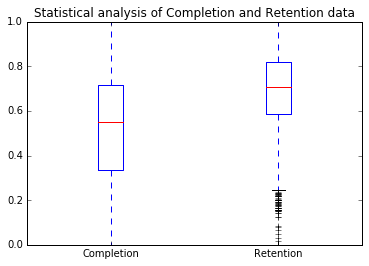

In [4]:
print "--- Completion ---"
print data.C150.describe()
print "--- Retention ---"
print data.RET_FT.describe()
plt.title("Statistical analysis of Completion and Retention data")
plt.boxplot([data.C150, data.RET_FT], labels=['Completion', 'Retention'])
plt.show()


## Correlation between Completion and Retention

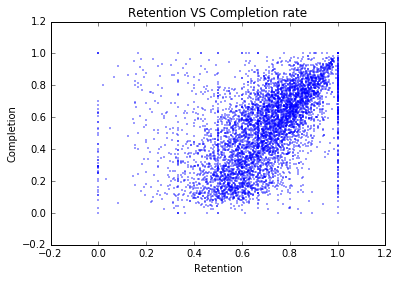

In [5]:
plt.scatter(data['RET_FT'], data['C150'], c='b', s=2, linewidths=0)
plt.title('Retention VS Completion rate')
plt.xlabel("Retention")
plt.ylabel("Completion")
plt.show()

## Exploratory Visualization

For each feature we will show the statistical analyis (mean, median, std dev), and use whisker plot to see the distribution. 
To see if the selected potential features have any correlation with the Completion and Retention, we will plot each features against Completion and Retention. In addition we will also use different colors to indicate different type of college. 

For plotting purpose, split data based on:
* 4 year college and less than 4 year college
* public, private and private for profit category

This will allow us to plot the different college types with different colors

In [6]:
data['L4_COLLEGE'] = data['L4_COLLEGE'].astype(int)

data_L4 = data[data['L4_COLLEGE'] == 1]
data_4  = data[data['L4_COLLEGE'] == 0]

data_control1 = data[data.CONTROL == 1] # public
data_control2 = data[data.CONTROL == 2] # private non-profit
data_control3 = data[data.CONTROL == 3] # private profit

data_for_plotting = {
    'data': data,
    'data_L4': data_L4,
    'data_4': data_4,
    'data_control1': data_control1,
    'data_control2': data_control2,
    'data_control3': data_control3
}

In [7]:
# --- group similar features together ---

faculty_cols = ['AVGFACSAL', 'PFTFAC', 'ADM_RATE_ALL']
stu_score_cols = ['ACTCMMID', 'SAT_AVG', 'SAT_AVG_ALL', 'SATVRMID', 'SATMTMID', 'SATWRMID']
cost_cols = ['COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'TUITFTE', 
             'INEXPFTE', 'NPT4']
grant_loan_cols = ['PCTPELL', 'PCTFLOAN']
stu_composition_cols = ['NUM4', 'UG25abv', 'PFTFTUG1_EF', 'UGDS', 'PAR_ED_PCT_1STGEN', 
                        'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 
                        'PAR_ED_PCT_PS', 'DEP_INC_AVG', 'IND_INC_AVG']
debt_cols = ['DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN']

### Faculty related factors

--- Avg faculty salary ---
count     3794.000000
mean      6019.977596
std       2220.556513
min        269.000000
25%       4490.500000
50%       5832.000000
75%       7299.000000
max      19862.000000
Name: AVGFACSAL, dtype: float64


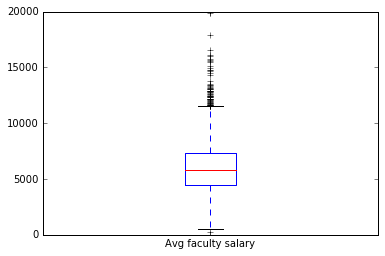

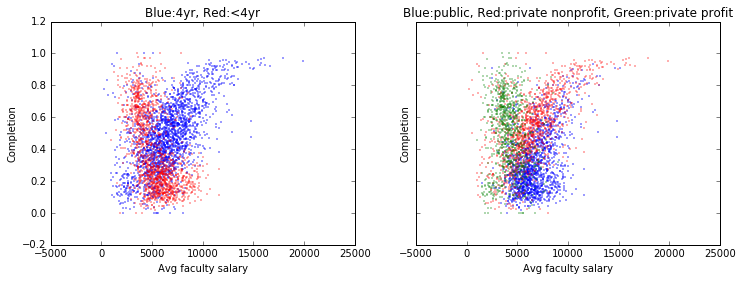

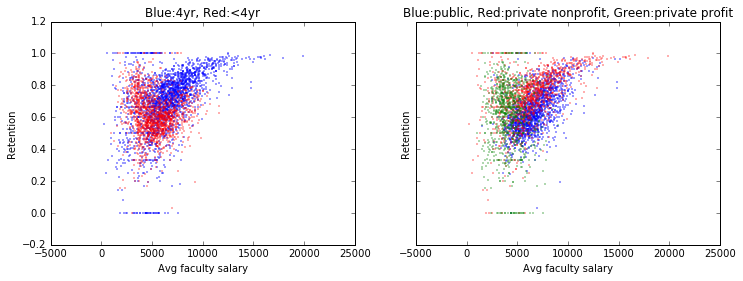

--- Full time faculty rate ---
count    3418.000000
mean        0.590395
std         0.299888
min         0.000000
25%         0.331300
50%         0.570350
75%         0.898350
max         1.000000
Name: PFTFAC, dtype: float64


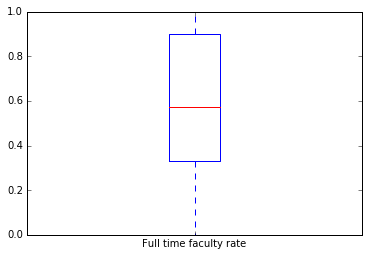

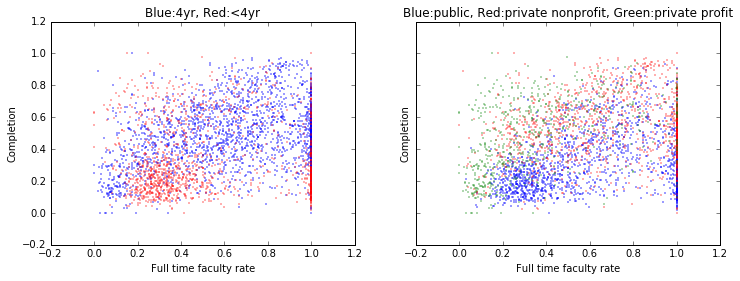

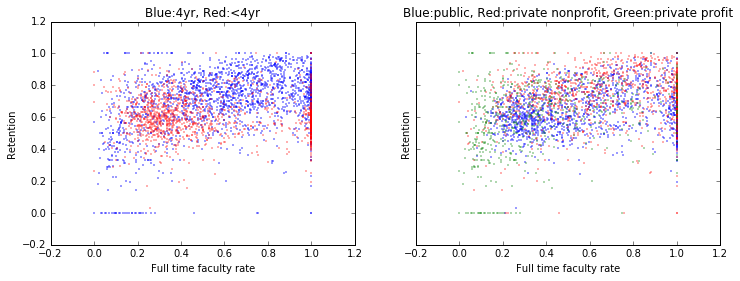

--- Admission rate ---
count    2065.000000
mean        0.671654
std         0.203158
min         0.000000
25%         0.548600
50%         0.684200
75%         0.816700
max         1.000000
Name: ADM_RATE_ALL, dtype: float64


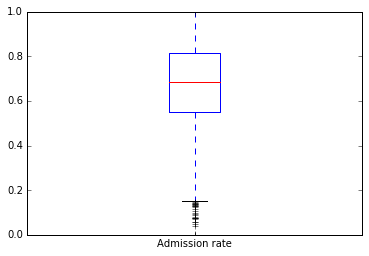

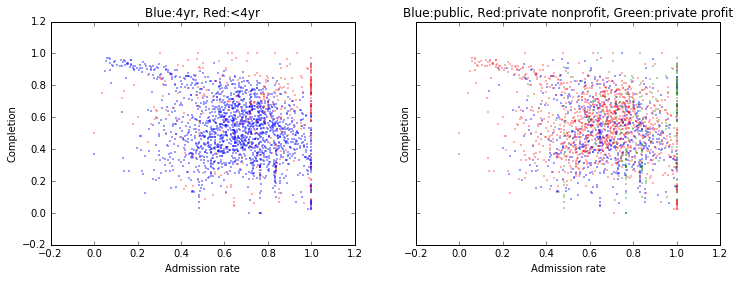

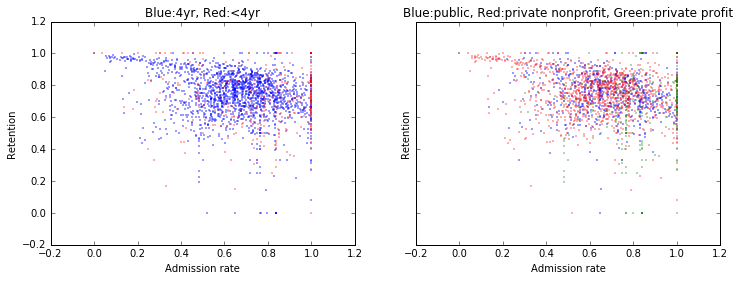

In [8]:
for col in faculty_cols:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)


There are some correlations for Full time faculty rate but it's pretty weak.
For Admission rate, there is a nice descending line between 0 and 0.4, but once the admission rate is above 0.4 it starts to vary widely (for both completion and retention).

### Categorical factors

--- Carnegie classification-Size & settings ---


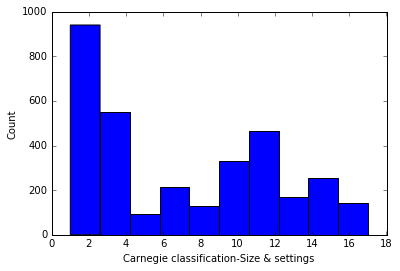

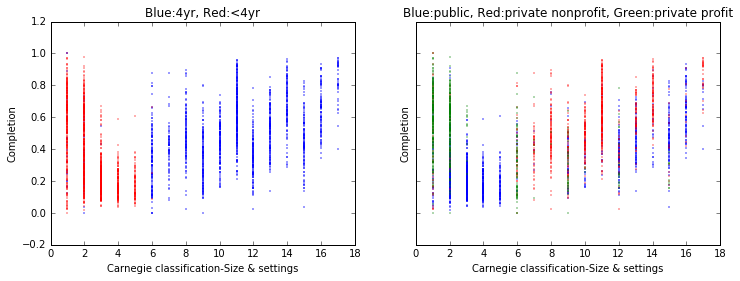

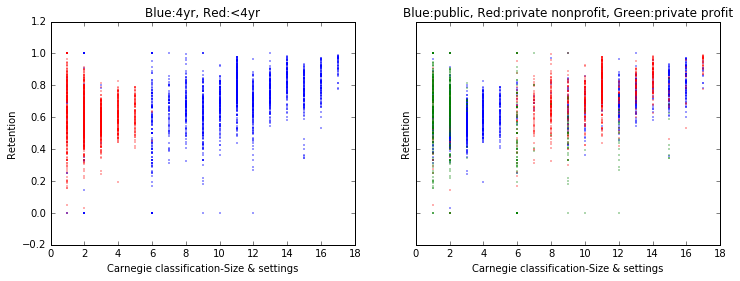

--- Carnegie classification-Undergrad profile  ---


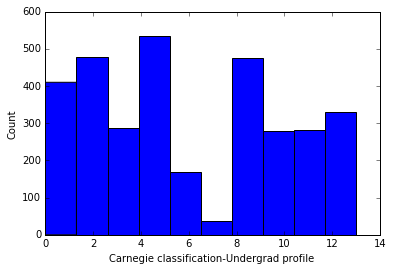

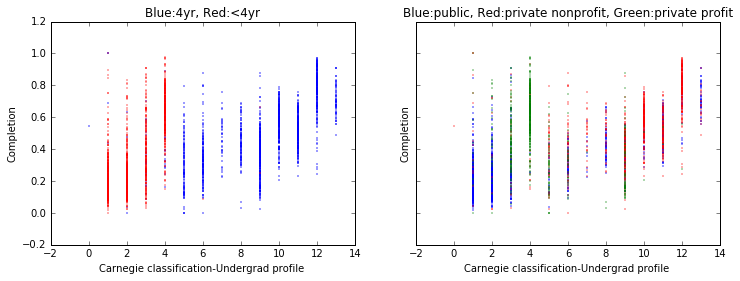

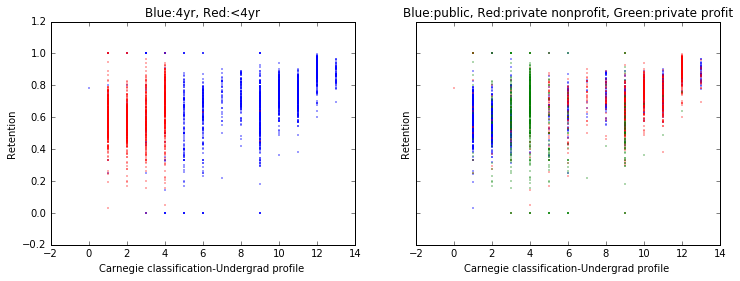

--- Carnegie classification-basic ---


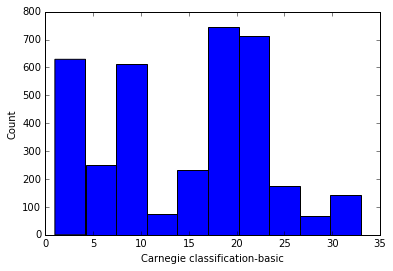

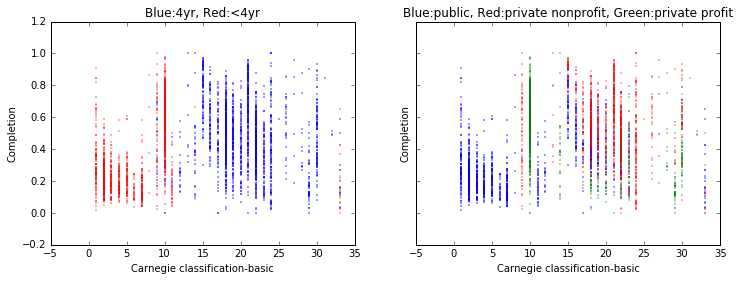

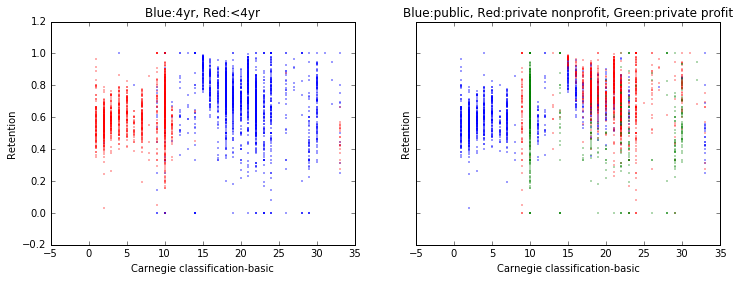

--- Locale ---


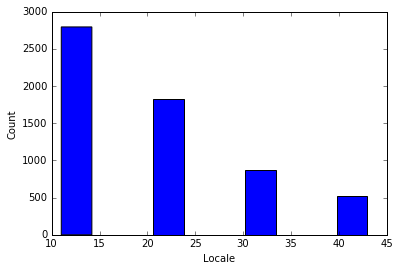

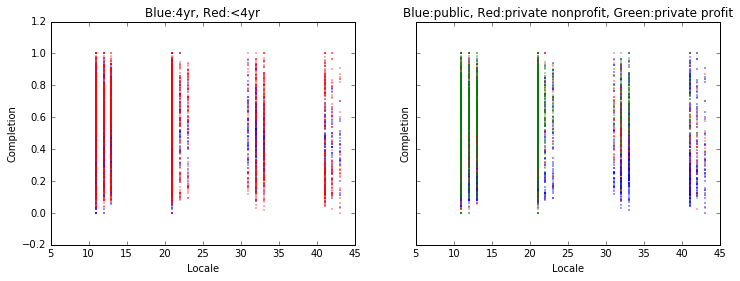

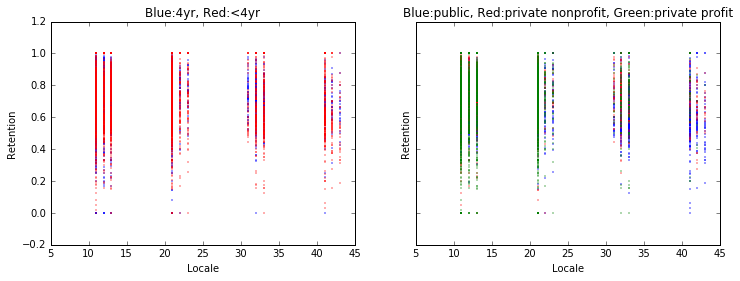

--- region ---


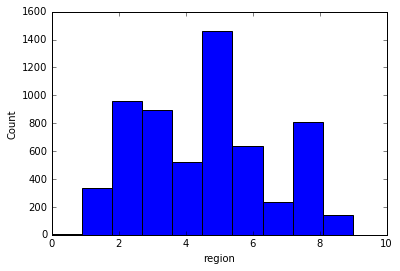

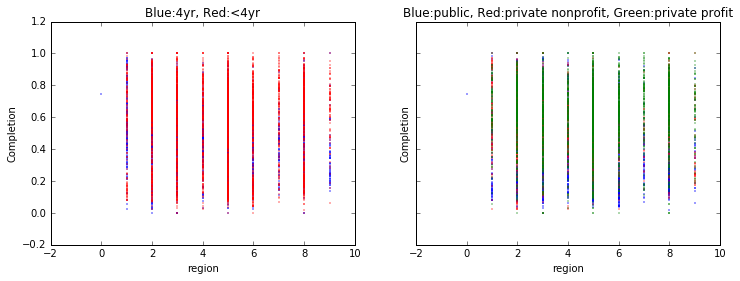

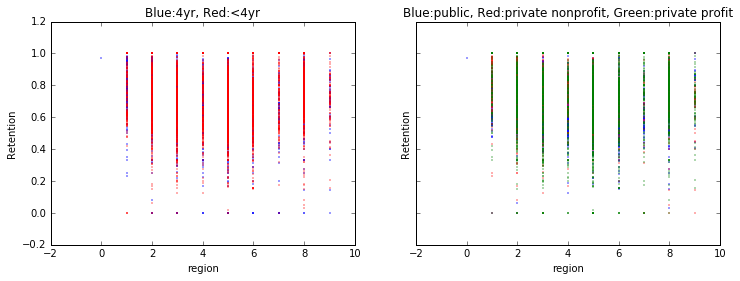

--- Predominant degree ---


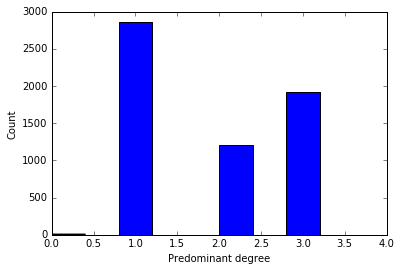

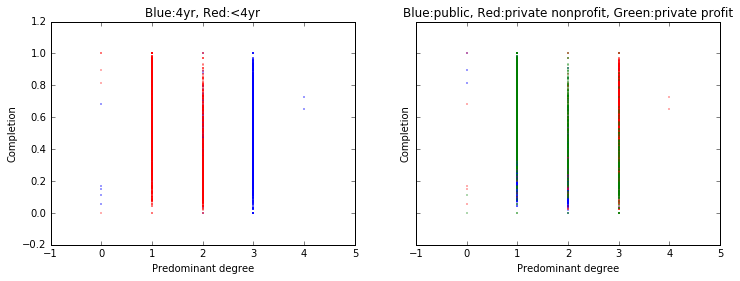

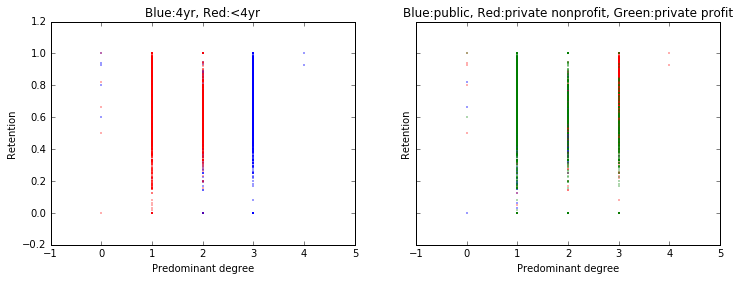

In [9]:
for col in ['CCSIZSET', 'CCUGPROF', 'CCBASIC', 'LOCALE', 'region', 'PREDDEG']:
    plot_feature_vs_completion([col], data_for_plotting, categorical=True)
    plot_feature_vs_retention([col], data_for_plotting)

Some carnegie classfications have higher completion and retention, so there is some correlation. 

"Degree of urbanization", "Region", and "Predominant degree awarded" do not have much correlation with the completion rate. So these features are a good candidate to be excluded from building the model. 

### Student score factors (SAT, ACT)

--- ACT ---
count    1327.000000
mean       23.152223
std         3.383400
min        14.000000
25%        21.000000
50%        23.000000
75%        25.000000
max        34.000000
Name: ACTCMMID, dtype: float64


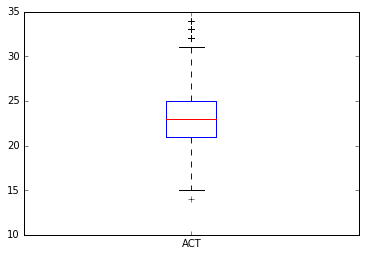

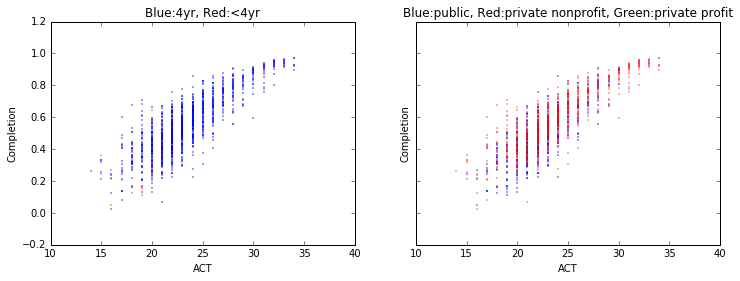

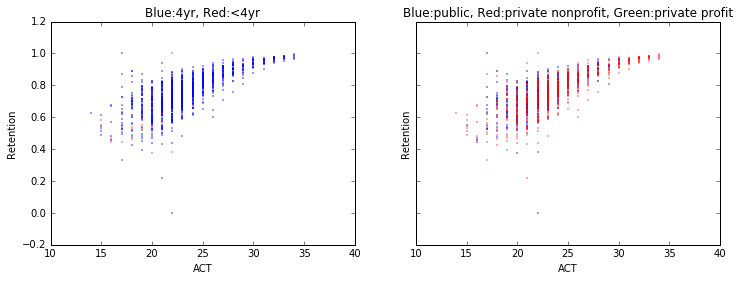

--- SAT ---
count    1405.000000
mean     1057.347331
std       132.157811
min       666.000000
25%       972.000000
50%      1038.000000
75%      1119.000000
max      1534.000000
Name: SAT_AVG, dtype: float64


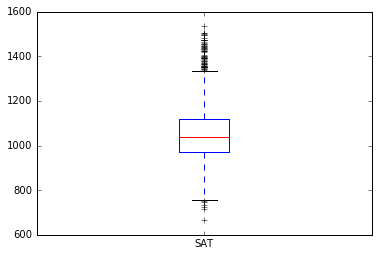

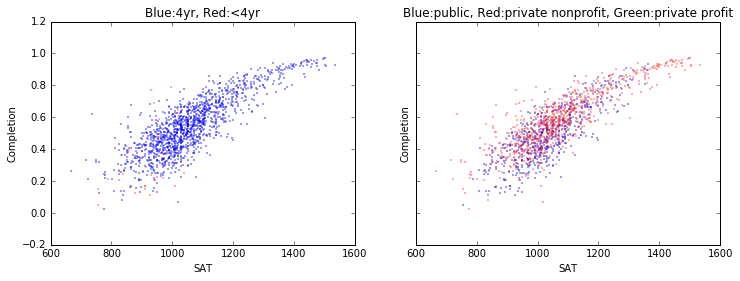

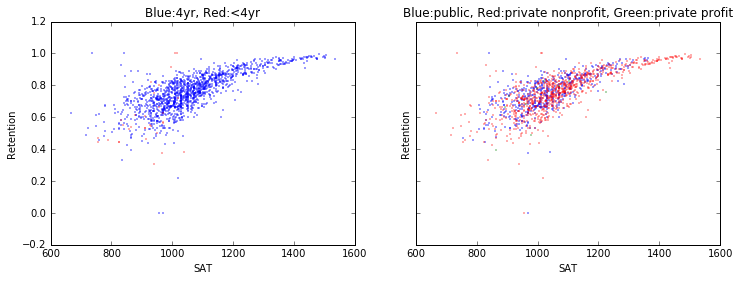

--- SAT all ---
count    1445.000000
mean     1061.523183
std       131.050271
min       666.000000
25%       977.000000
50%      1048.000000
75%      1123.000000
max      1534.000000
Name: SAT_AVG_ALL, dtype: float64


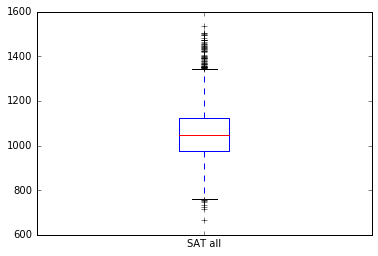

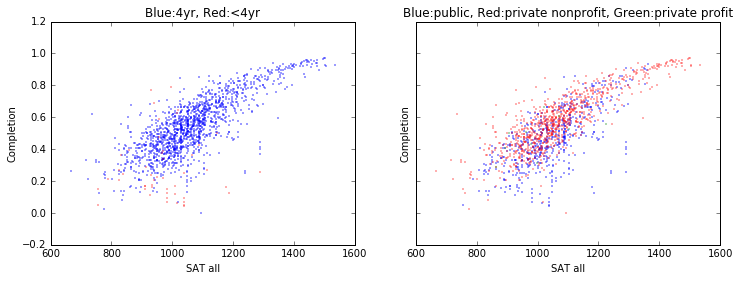

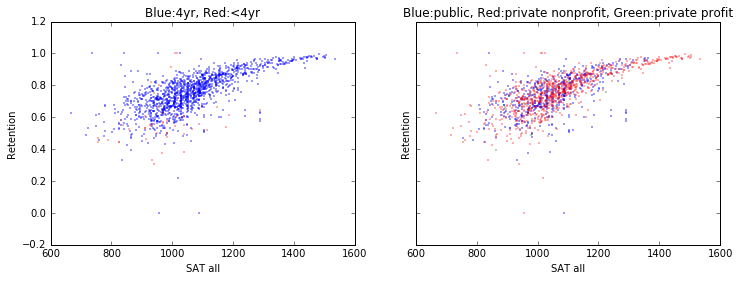

--- SAT reading ---
count    1291.000000
mean      522.086754
std        67.933188
min       290.000000
25%       475.000000
50%       515.000000
75%       555.000000
max       760.000000
Name: SATVRMID, dtype: float64


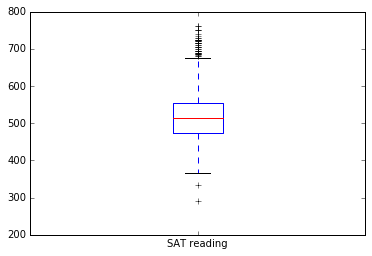

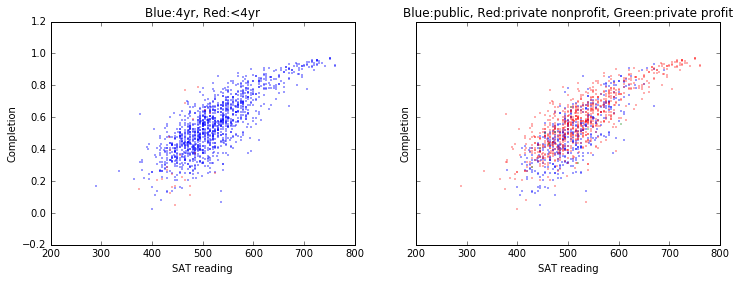

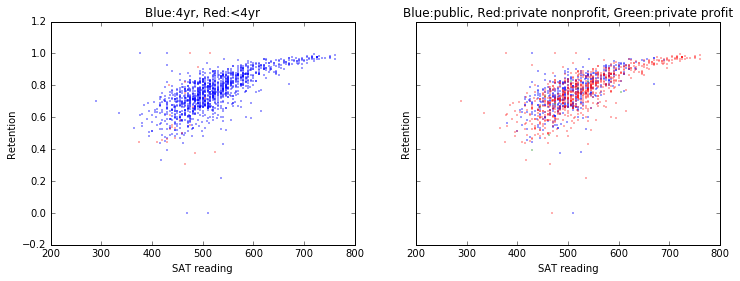

--- SAT math ---
count    1305.000000
mean      531.052107
std        71.734121
min       310.000000
25%       485.000000
50%       520.000000
75%       565.000000
max       785.000000
Name: SATMTMID, dtype: float64


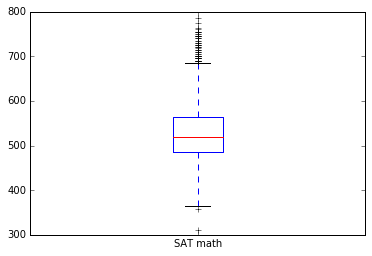

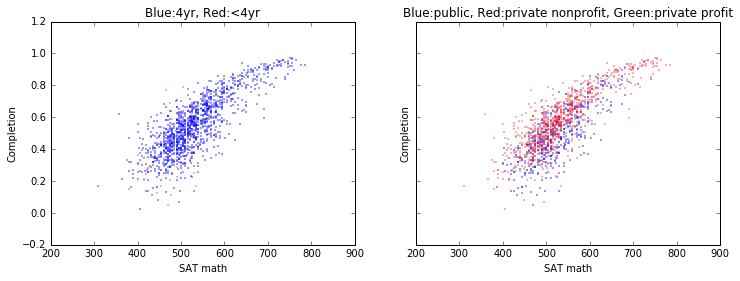

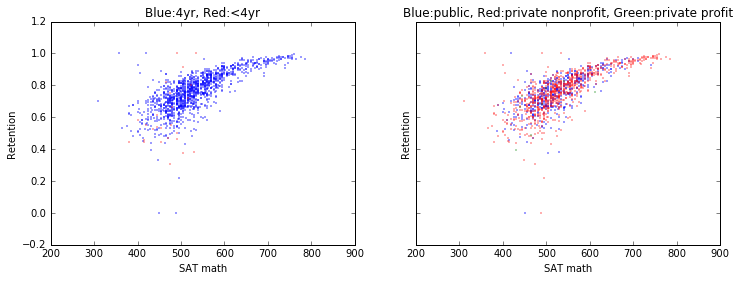

--- SAT writing ---
count    789.000000
mean     521.144487
std       77.662385
min      350.000000
25%      469.000000
50%      510.000000
75%      555.000000
max      755.000000
Name: SATWRMID, dtype: float64


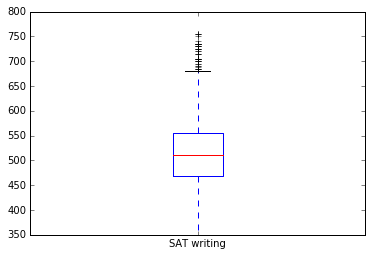

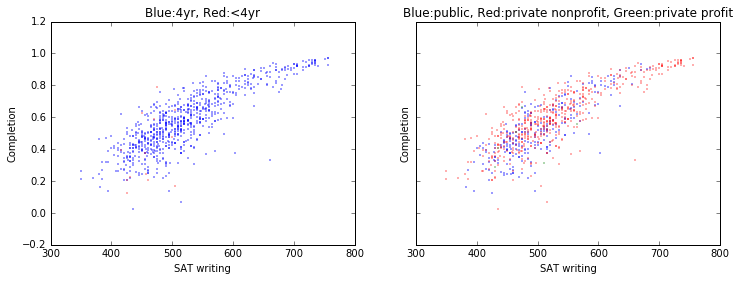

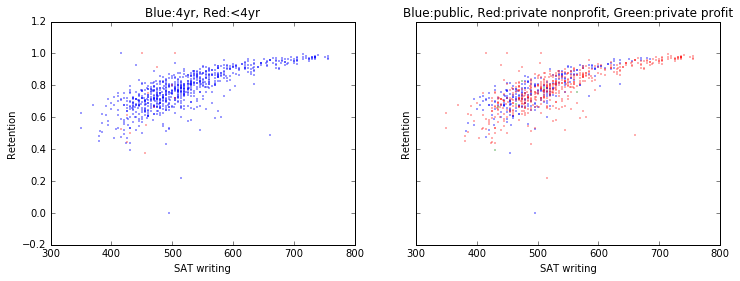

In [10]:
for col in stu_score_cols:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)

There is a nice correlation between SAT and ACT score. The higher SAT / ACT score, the higher completion and retention is. The subject SAT score (math, writing, reading) follows the same SAT pattern, so we can just use the average SAT for building our model.

### Cost related factors

--- Avg cost academic year ---
count     3691.000000
mean     24397.743430
std      12682.727804
min       4157.000000
25%      13734.000000
50%      22188.000000
75%      31251.000000
max      74473.000000
Name: COSTT4_A, dtype: float64


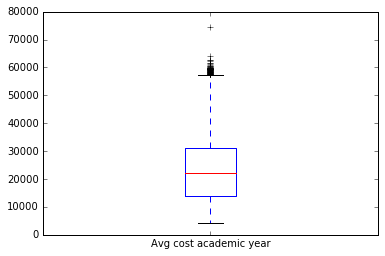

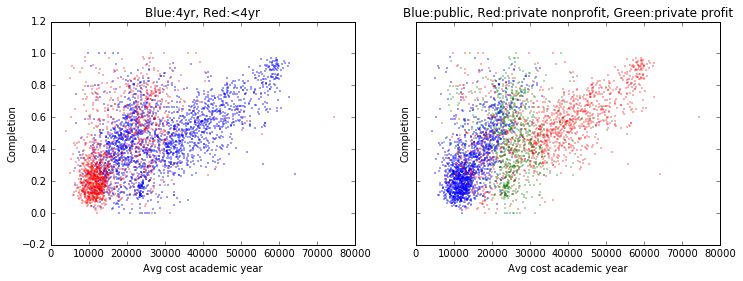

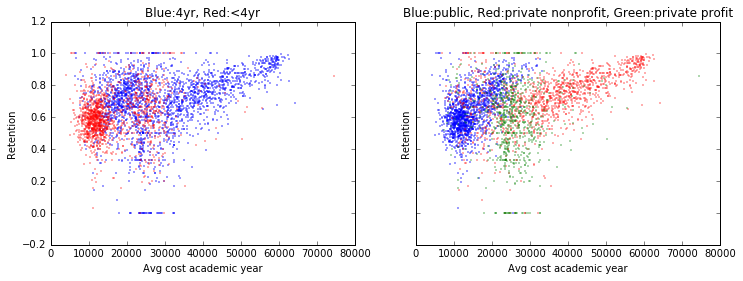

--- Avg cost program year ---
count     2249.000000
mean     18184.356158
std       6066.019317
min       3057.000000
25%      13965.000000
50%      17532.000000
75%      22271.000000
max      76806.000000
Name: COSTT4_P, dtype: float64


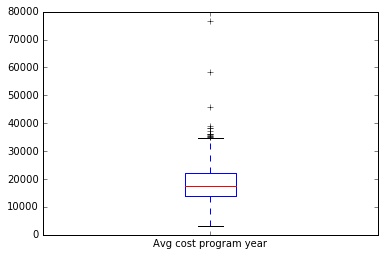

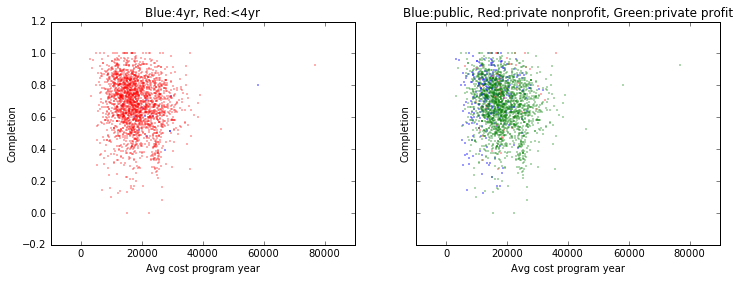

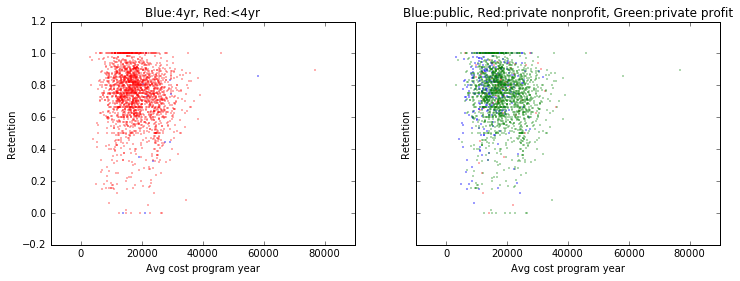

--- In state tuition ---
count     3677.000000
mean     13971.853141
std      11362.933424
min        675.000000
25%       4600.000000
50%      10900.000000
75%      19650.000000
max      64900.000000
Name: TUITIONFEE_IN, dtype: float64


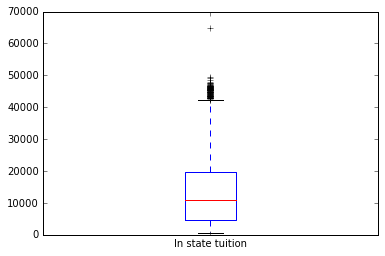

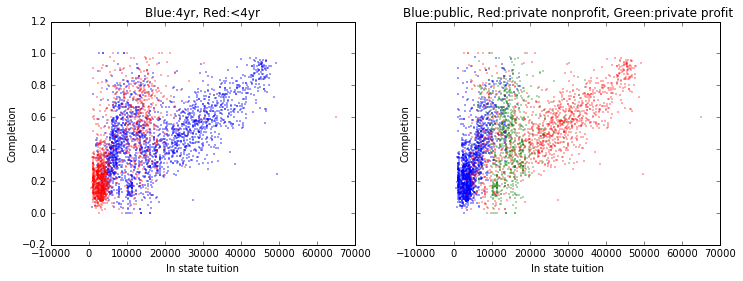

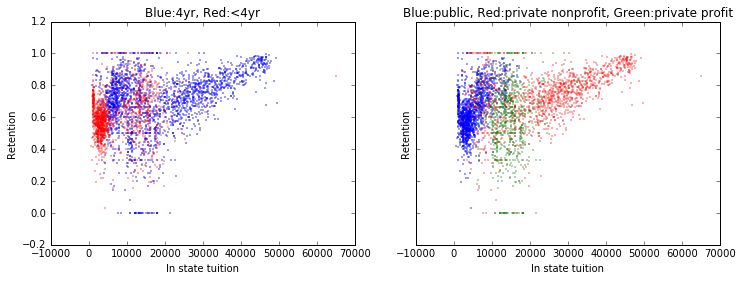

--- Out of state tuition ---
count     3677.000000
mean     16689.985586
std      10354.862094
min        675.000000
25%       8529.000000
50%      14314.000000
75%      22400.000000
max      64900.000000
Name: TUITIONFEE_OUT, dtype: float64


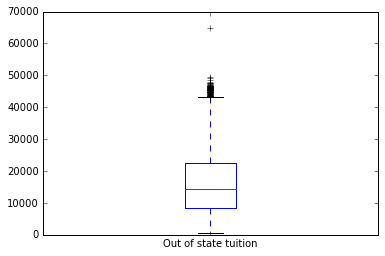

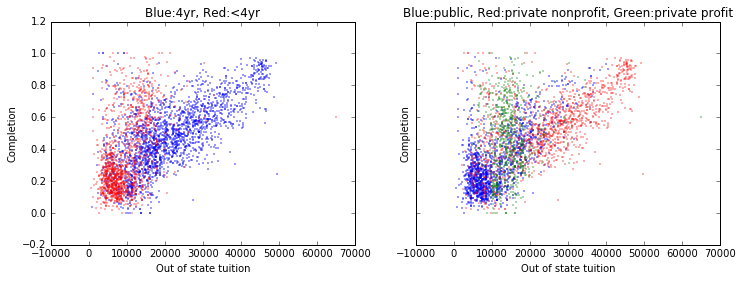

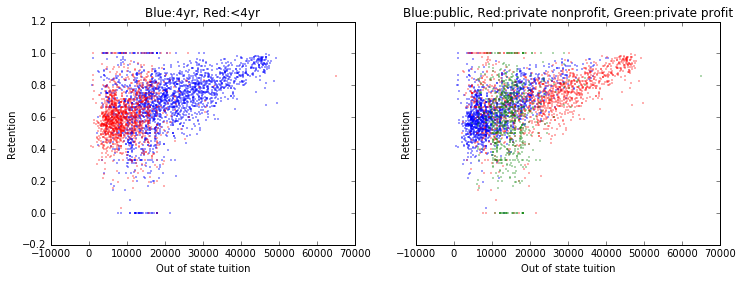

--- Tuition fee program year ---
count     2278.000000
mean     14826.644864
std       6951.908906
min        263.000000
25%      11200.000000
50%      14600.000000
75%      16925.000000
max      88550.000000
Name: TUITIONFEE_PROG, dtype: float64


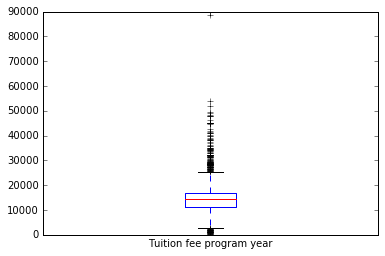

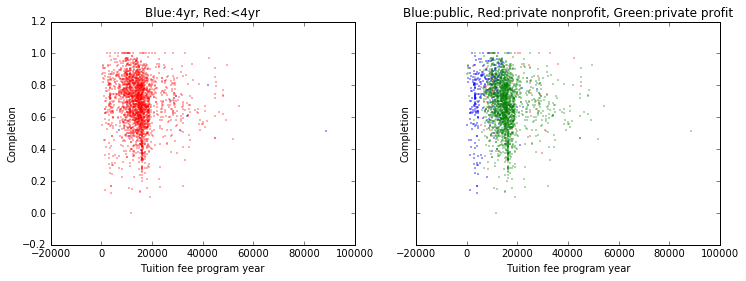

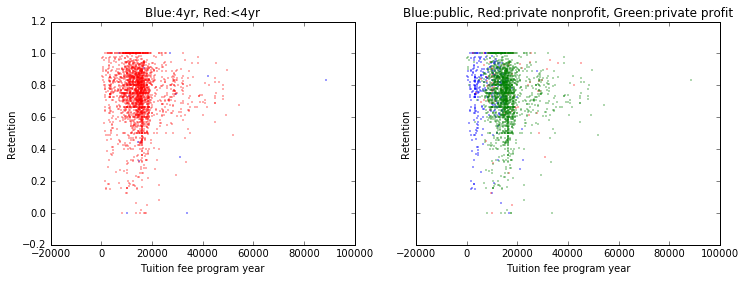

In [11]:
for col in cost_cols[:5]:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)

There is an interesting similar correlation for "Average cost academic year" and "In state tuition". There is almost a straight positive linear correlation for "Out of state tuition".

Not very interesting correlation for Average cost program year and Tuition fee program year. 

--- Net revenue per FTE student ---
count      6006.000000
mean       9081.320180
std        7112.088738
min           0.000000
25%        3758.500000
50%        8177.500000
75%       12479.000000
max      155643.000000
Name: TUITFTE, dtype: float64


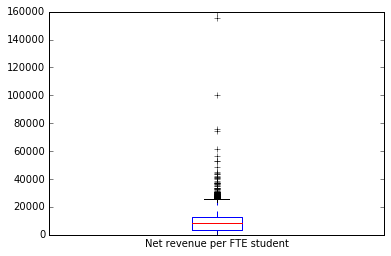

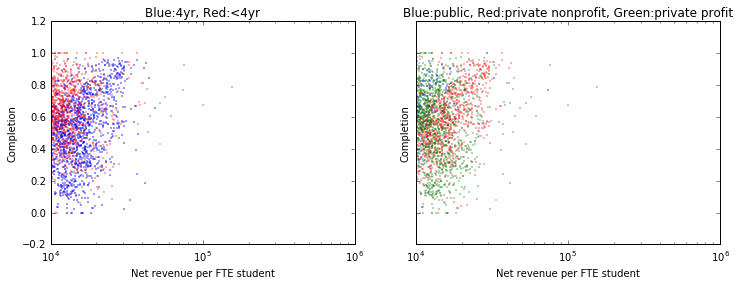

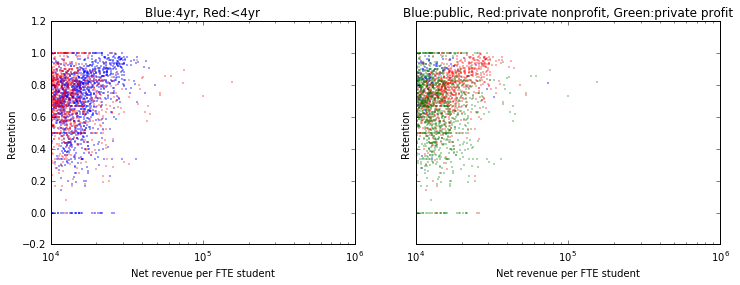

--- Expense per FTE student ---
count      6006.000000
mean       6400.550616
std        5913.062878
min           0.000000
25%        3327.250000
50%        5199.000000
75%        7639.000000
max      106214.000000
Name: INEXPFTE, dtype: float64


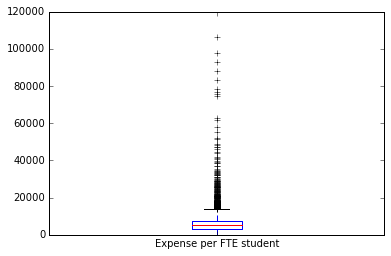

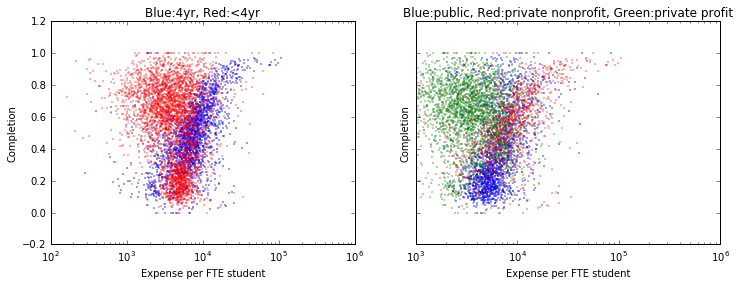

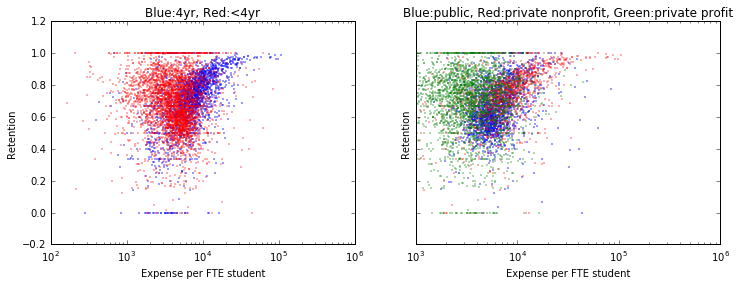

--- Avg net price Title IV ---
count     5938.000000
mean     15247.403334
std       7573.627739
min      -1643.000000
25%       9197.250000
50%      14750.500000
75%      20191.000000
max      73183.000000
Name: NPT4, dtype: float64


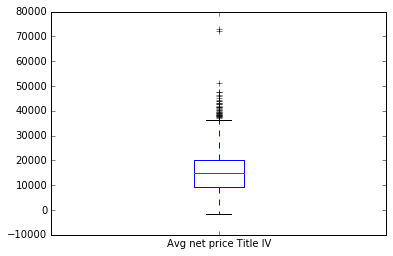

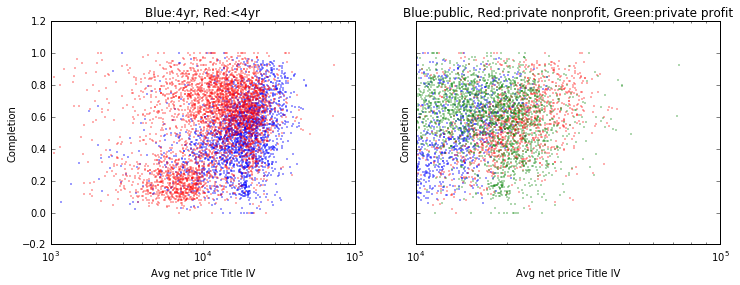

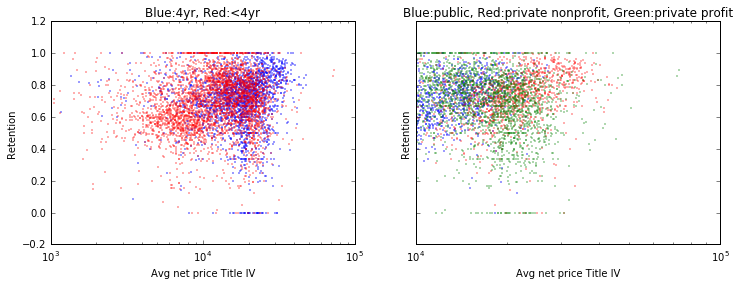

In [12]:
for col in cost_cols[5:]:
    plot_feature_vs_completion([col], data_for_plotting, xscale='log')
    plot_feature_vs_retention([col], data_for_plotting, xscale='log')

There is some correlation on Expense per FTE student. Not so much for Net revenue per FTE student and Average net price Title IV.  

### Grant & Loan factors

--- % Pell Grant receiver ---
count    6005.000000
mean        0.523362
std         0.219421
min         0.000000
25%         0.356000
50%         0.502900
75%         0.693300
max         1.000000
Name: PCTPELL, dtype: float64


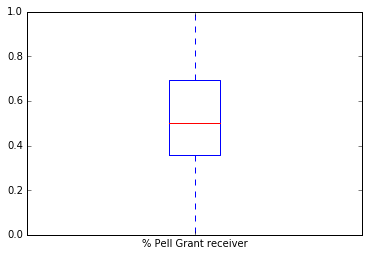

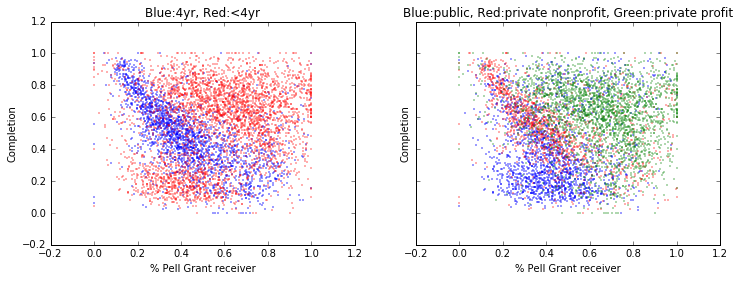

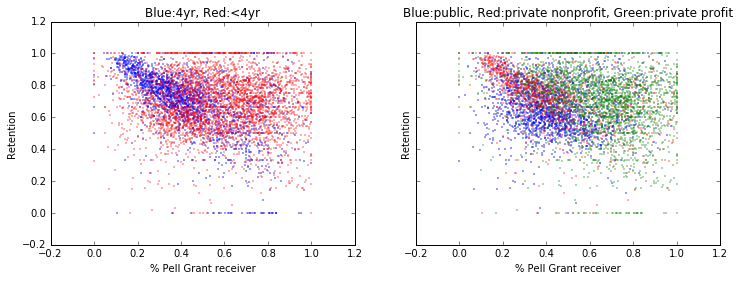

--- % Fed student loan ---
count    6005.000000
mean        0.516494
std         0.282934
min         0.000000
25%         0.324700
50%         0.575300
75%         0.736600
max         1.000000
Name: PCTFLOAN, dtype: float64


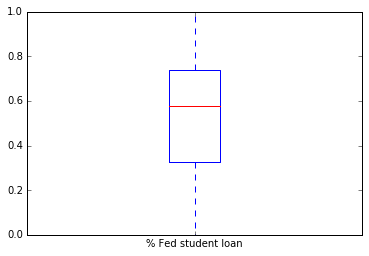

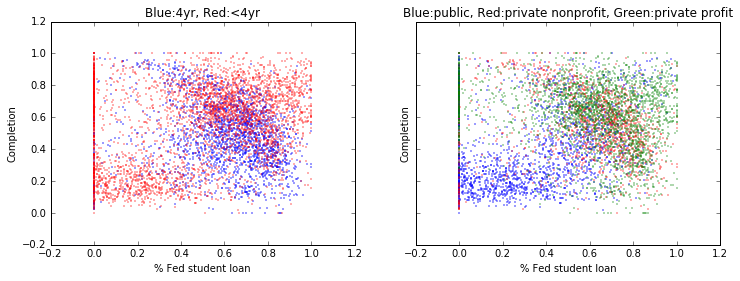

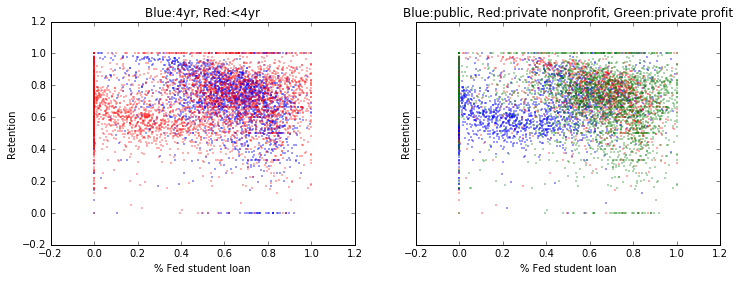

In [13]:
for col in grant_loan_cols:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)

### Student composition factors

--- Num Title IV student ---
count     5938.000000
mean       274.092792
std        480.205786
min          1.000000
25%         33.000000
50%        105.500000
75%        304.000000
max      13183.000000
Name: NUM4, dtype: float64


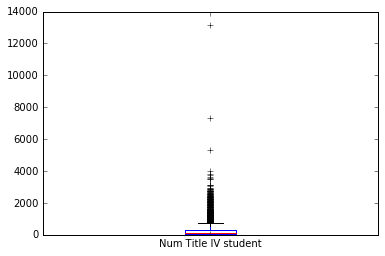

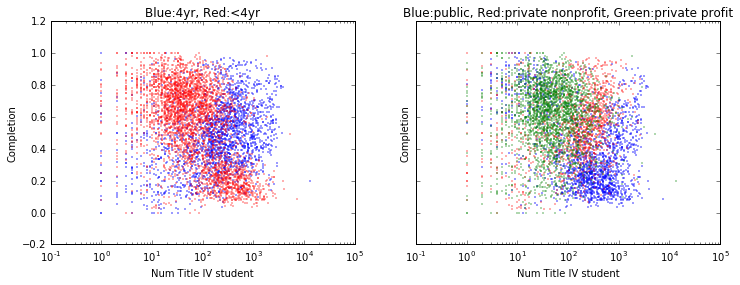

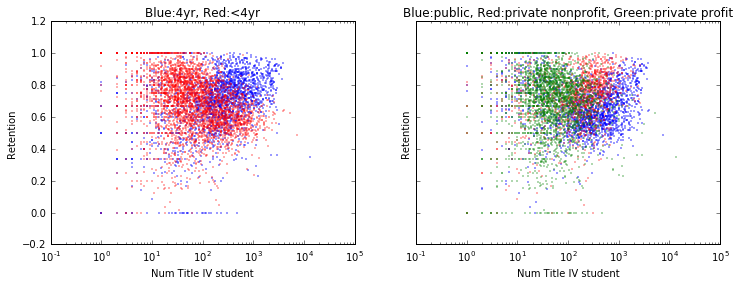

--- Number of Undergrad degree seeking ---
count      6007.000000
mean       2603.738805
std        5680.925916
min           2.000000
25%         135.000000
50%         554.000000
75%        2347.500000
max      166816.000000
Name: UGDS, dtype: float64


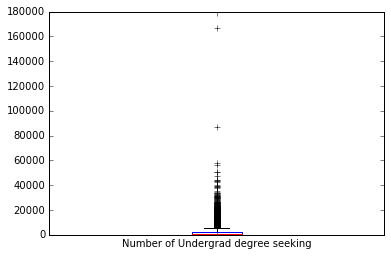

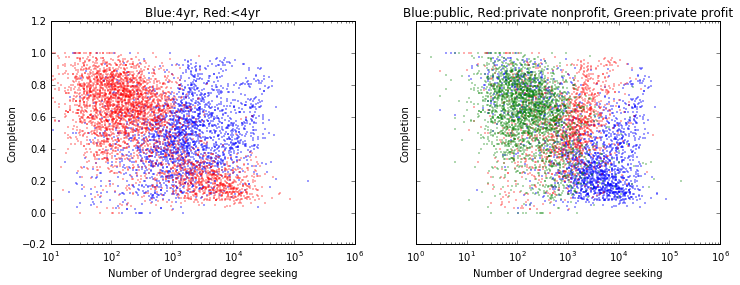

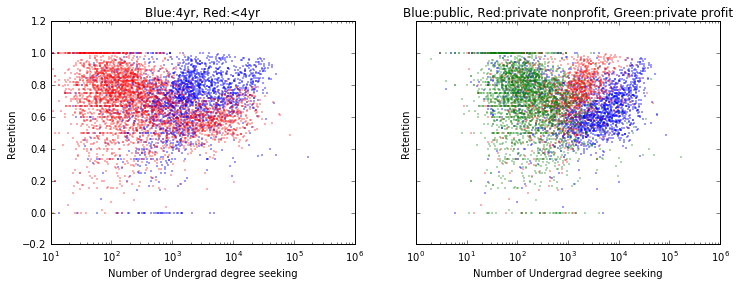

--- % undergrad > 25 yr ---
count    5964.000000
mean        0.386220
std         0.217355
min         0.000500
25%         0.228600
50%         0.379100
75%         0.532950
max         1.000000
Name: UG25abv, dtype: float64


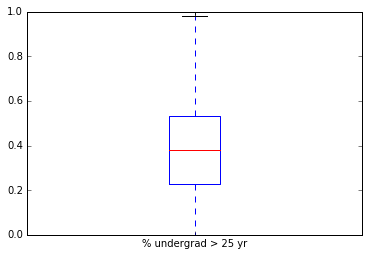

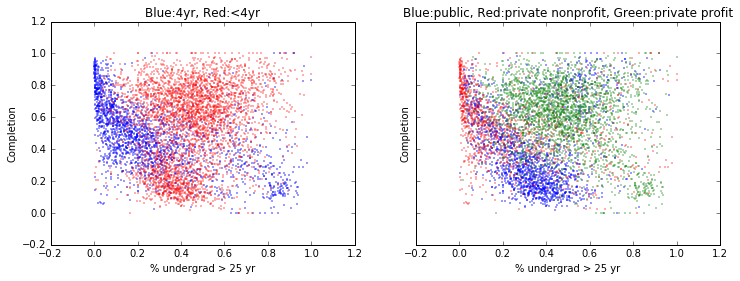

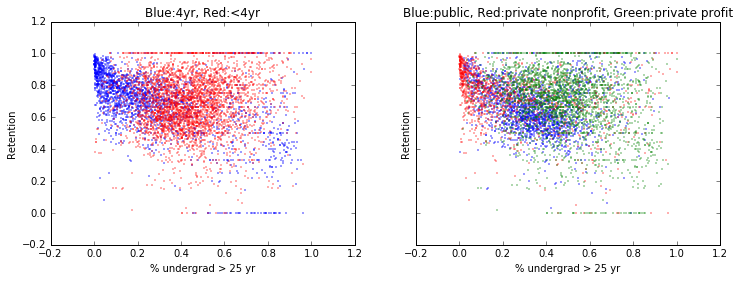

--- Undergrad 1st-time degree seeking ---
count    3290.000000
mean        0.534137
std         0.245144
min         0.008600
25%         0.336250
50%         0.533950
75%         0.736025
max         1.000000
Name: PFTFTUG1_EF, dtype: float64


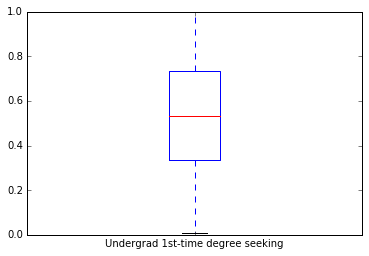

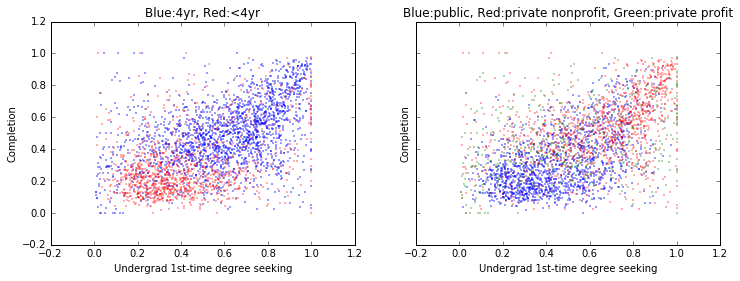

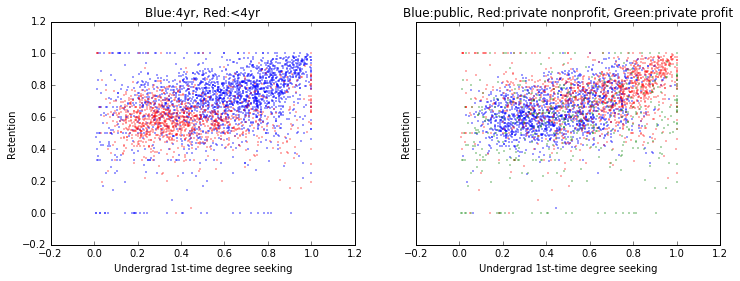

In [14]:
# print stu_composition_cols
plot_feature_vs_completion(['NUM4'], data_for_plotting, xscale='log')
plot_feature_vs_retention(['NUM4'], data_for_plotting, xscale='log')
plot_feature_vs_completion(['UGDS'], data_for_plotting, xscale='log')
plot_feature_vs_retention(['UGDS'], data_for_plotting, xscale='log')
for col in ['UG25abv', 'PFTFTUG1_EF']:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)


--- % parent education middle school ---
count    5423.000000
mean        0.053750
std         0.048083
min         0.000000
25%         0.024551
50%         0.044800
75%         0.065950
max         0.875000
Name: PAR_ED_PCT_MS, dtype: float64


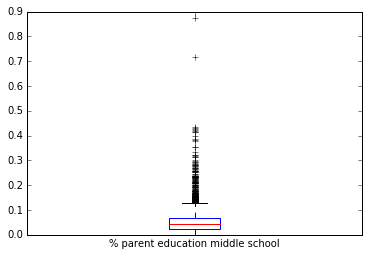

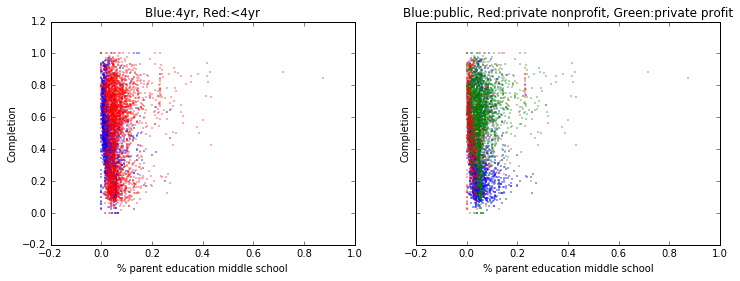

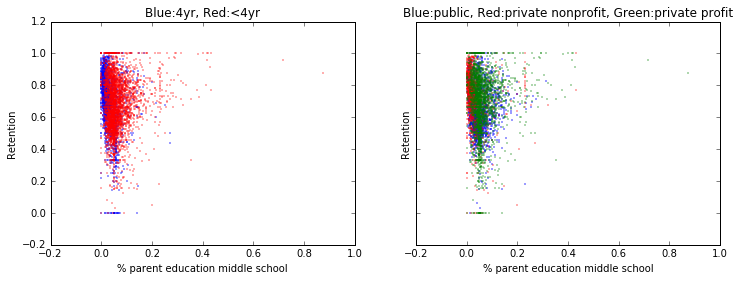

--- % parent education high school ---
count    5533.000000
mean        0.418279
std         0.105440
min         0.000000
25%         0.364706
50%         0.438525
75%         0.483333
max         0.994565
Name: PAR_ED_PCT_HS, dtype: float64


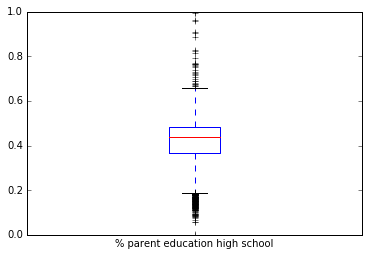

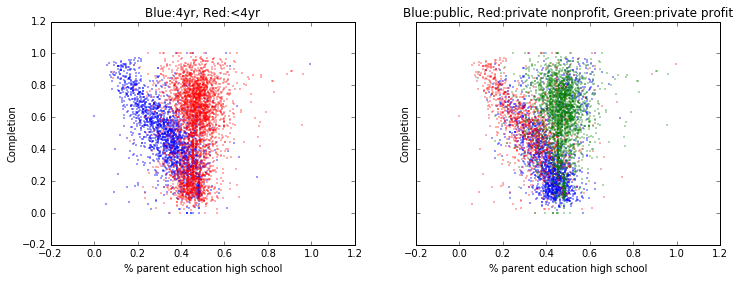

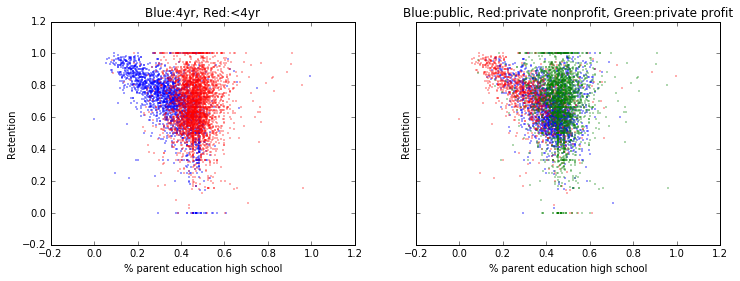

--- % parent education post secondary ---
count    5533.000000
mean        0.529217
std         0.128194
min         0.030588
25%         0.447724
50%         0.504145
75%         0.602070
max         1.000000
Name: PAR_ED_PCT_PS, dtype: float64


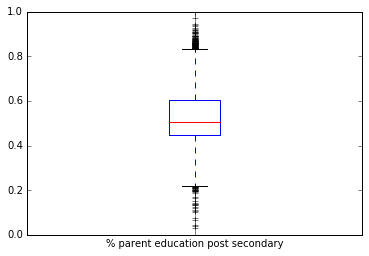

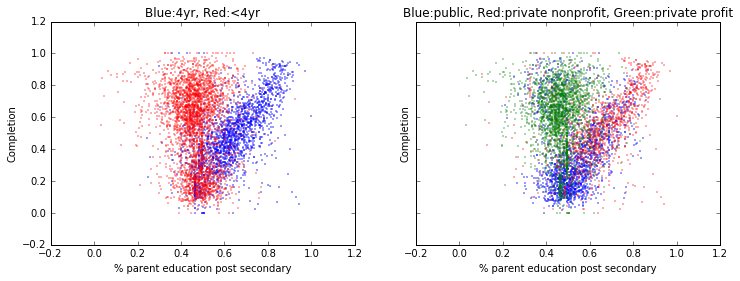

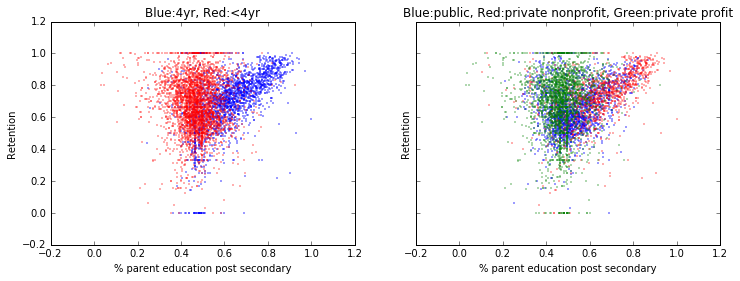

--- Avg income dependent stu ---
count      5703.000000
mean      47121.622721
std       22703.565318
min         965.440200
25%       30284.073625
50%       41887.678630
75%       60278.998065
max      152596.083700
Name: DEP_INC_AVG, dtype: float64


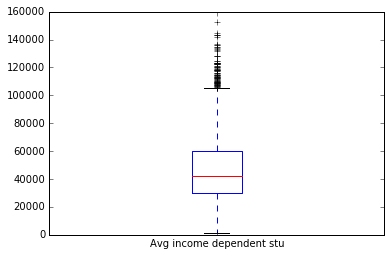

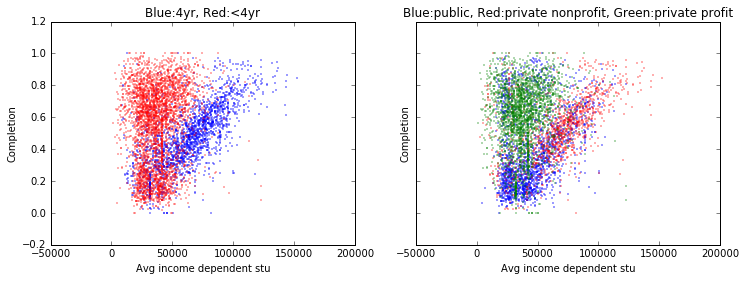

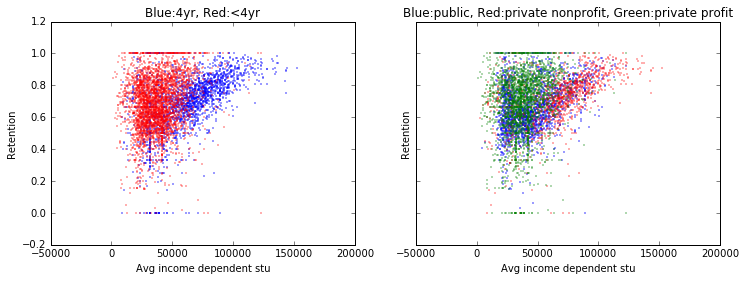

--- Avg income independent stu ---
count     5688.000000
mean     19034.784877
std       7705.193379
min         93.628337
25%      13875.407000
50%      17835.884930
75%      22869.151280
max      66954.567240
Name: IND_INC_AVG, dtype: float64


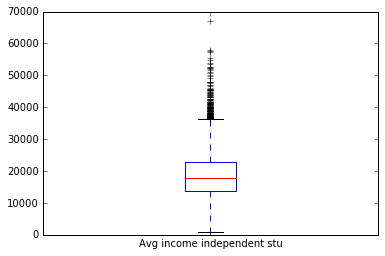

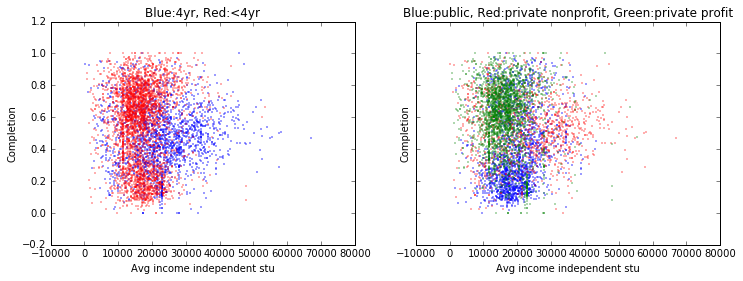

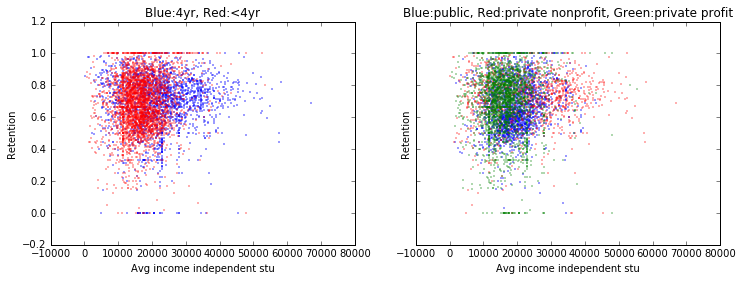

In [15]:
# print stu_composition_cols
for col in stu_composition_cols[5:10]:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)

There is a good correlation between Percentage of parent education post secondary and completion rate, and the inverse for Percentage of parent education high school. Percentage of parent education middle school does not have much correlation with completion rate, so that’s another candidate feature to drop.  

--- Median debt ---
count     5242.000000
mean     11812.293876
std       5672.080598
min        333.000000
25%       7555.500000
50%       9544.500000
75%      15826.500000
max      38000.000000
Name: DEBT_MDN, dtype: float64


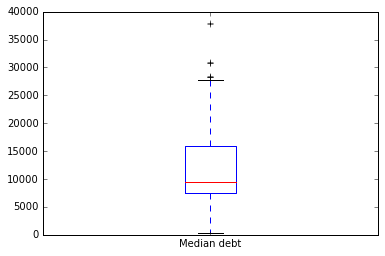

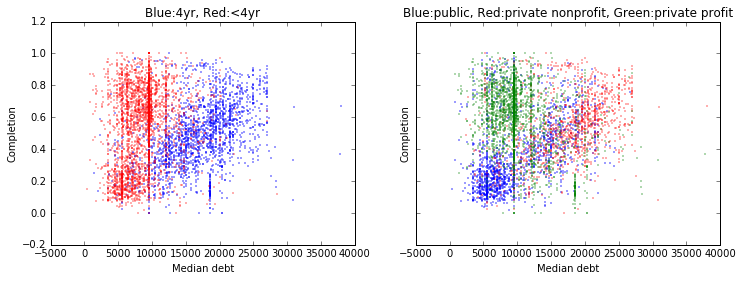

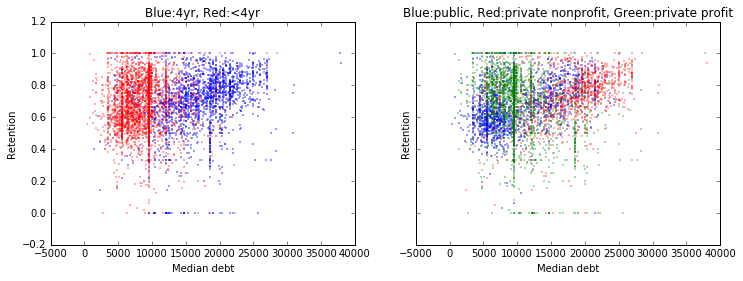

--- Median debt complete ---
count     5186.000000
mean     16434.883051
std       8434.088891
min        723.500000
25%       9500.000000
50%      13875.000000
75%      23773.375000
max      53831.500000
Name: GRAD_DEBT_MDN, dtype: float64


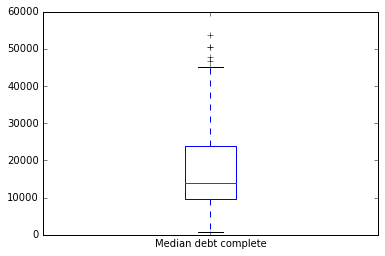

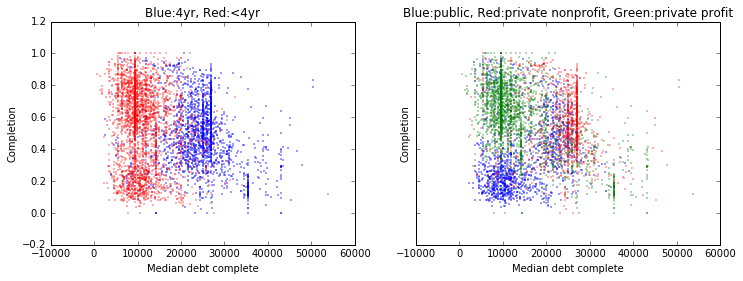

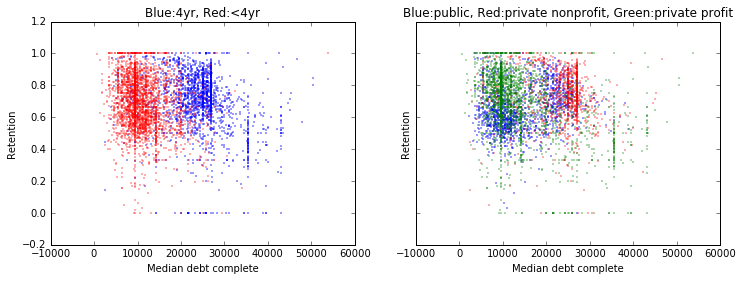

--- Median debt non-completer ---
count     4997.000000
mean      7576.220532
std       3475.891984
min        745.000000
25%       4750.000000
50%       6500.000000
75%       9500.000000
max      35000.000000
Name: WDRAW_DEBT_MDN, dtype: float64


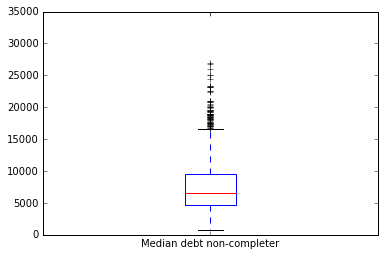

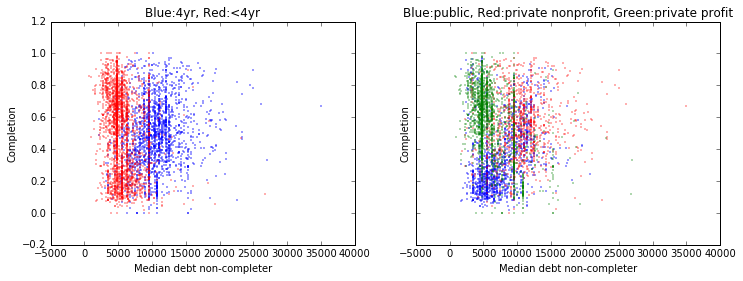

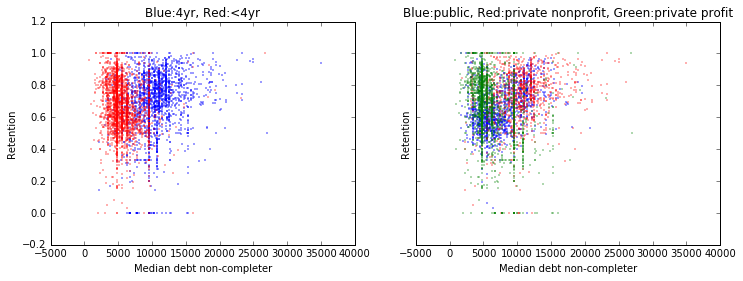

In [16]:
for col in debt_cols:
    plot_feature_vs_completion([col], data_for_plotting)
    plot_feature_vs_retention([col], data_for_plotting)

There is some correlation between debt and completion rate, but it's not a clear linear correlation. It's more like a few clusters with gaussian distribution for each college type (private, public, profit). 